In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression



In [84]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

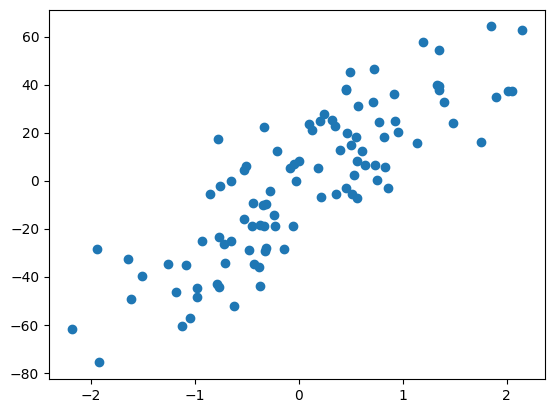

In [85]:
plt.scatter(X,y)

In [86]:
X.shape

(100, 1)

In [87]:
y.shape

(100,)

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)


In [89]:
X_train.shape

(80, 1)

In [90]:
lr=LinearRegression()


In [91]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
lr.coef_

array([28.16404017])

In [93]:
lr.intercept_

np.float64(-2.7130725669241036)

In [94]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6186926408914155

### making gradient-descent class

In [123]:
class GDregressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = 120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):

        X = X.ravel()

        for i in range(self.epochs):

            error = y - (self.m * X + self.b)

            loss_slop_b = (-2/len(X)) * np.sum(error)
            loss_slop_m = (-2/len(X)) * np.sum(X * error)

            self.b = self.b - self.lr * loss_slop_b
            self.m = self.m - self.lr * loss_slop_m

        print(self.m, self.b)

    def predict(self, X):
        return self.m * X + self.b


In [133]:
gd = GDregressor(0.1,50)

In [134]:
gd.fit(X_train,y_train)


28.167714226290265 -2.7119248782889813


In [135]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6186866996414385